### Create a matrix of size 3x3 which when convolved with box.png results in a white line where the white meets the black.

In [80]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [81]:
i1 = './A2_resources/box.png'

img1 = cv2.imread(i1, 0)
img1 = img1.astype(np.float16)

In [94]:
mat1 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

In [90]:
def im2col(A, block, stepsize=1):
    m,n = A.shape
    s0, s1 = A.strides    
    nrows = m-block[0]+1
    ncols = n-block[1]+1
    shp = block[0],block[1],nrows,ncols
    strd = s0,s1,s0,s1

    out_view = np.lib.stride_tricks.as_strided(A, shape=shp, strides=strd)
    return out_view.reshape(block[0]*block[1],-1)[:,::stepsize]

In [91]:
def conv(img, mat):
    a1, a2 = img.shape
    
    b1, b2 = mat.shape
    
    mat_f = np.array(mat.flatten())
    imcol = im2col(img, (a1-b1+1,a2-b2+1))
    x = np.multiply(imcol, mat_f)
    y = np.sum(x, axis = 1)
    y = y.reshape(a1-b1+1, a2-b2+1)
    
    return y

In [95]:
# output1 = np.clip(conv(img1, laplacian1), 0, 255)
output = np.clip(conv(img1, mat1), 0, 255)
output = output.astype(np.uint8)
img1 = img1.astype(np.uint8)

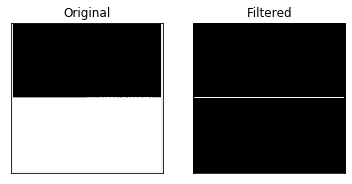

In [96]:
plt.subplot(121),plt.imshow(img1, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output, cmap = 'gray')
plt.title('Filtered'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
o